Customer Churn Analysis PPT


https://drive.google.com/file/d/1FwCkjc9hGOlD6zUKmlkr0fghGHDlOMbT/view?usp=sharing

# CUSTOMER CHURN

# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Loading dataset into a DataFrame

In [ ]:
df = pd.read_csv("/content/Customer Churn.csv")
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [ ]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [ ]:
df['Complains'].replace({0:'no',1:'yes'},inplace = True)
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,no,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,no,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,no,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,no,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,no,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,no,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,no,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,no,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,no,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [ ]:
df['Status'].replace({1:'0',2:'1'},inplace = True)
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,no,38,0,4370,71,5,17,3,1,0,30,197.640,0
1,0,no,39,0,318,5,7,4,2,1,1,25,46.035,0
2,10,no,37,0,2453,60,359,24,3,1,0,30,1536.520,0
3,10,no,38,0,4198,66,1,35,1,1,0,15,240.020,0
4,3,no,38,0,2393,58,2,33,1,1,0,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,no,19,2,6697,147,92,44,2,2,0,25,721.980,0
3146,17,no,17,1,9237,177,80,42,5,1,0,55,261.210,0
3147,13,no,18,4,3157,51,38,21,3,1,0,30,280.320,0
3148,7,no,11,2,4695,46,222,12,3,1,0,30,1077.640,0


In [ ]:
df['Tariff Plan'].replace({1:'0',2:'1'},inplace = True)
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,no,38,0,4370,71,5,17,3,0,0,30,197.640,0
1,0,no,39,0,318,5,7,4,2,0,1,25,46.035,0
2,10,no,37,0,2453,60,359,24,3,0,0,30,1536.520,0
3,10,no,38,0,4198,66,1,35,1,0,0,15,240.020,0
4,3,no,38,0,2393,58,2,33,1,0,0,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,no,19,2,6697,147,92,44,2,1,0,25,721.980,0
3146,17,no,17,1,9237,177,80,42,5,0,0,55,261.210,0
3147,13,no,18,4,3157,51,38,21,3,0,0,30,280.320,0
3148,7,no,11,2,4695,46,222,12,3,0,0,30,1077.640,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   object 
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   object 
 10  Status                   3150 non-null   object 
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(10)

#Data preprocessing and EDA

In [ ]:

num_rows, num_columns = df.shape
threshold = 0.1  # Define a threshold for considering data as unbalanced

if num_rows / num_columns < threshold:
    df_balance = "Unbalanced"
    print("Data is Unbalanced")
else:
    df_balance = "Balanced"
    print("Data is Balanced")


Data is Balanced


1. What is the size of the dataset

In [ ]:
size = df.shape
print("the size of the dataset is",size)

the size of the dataset is (3150, 14)


2. Are there any missing values in the dataset, and how are they distributed?

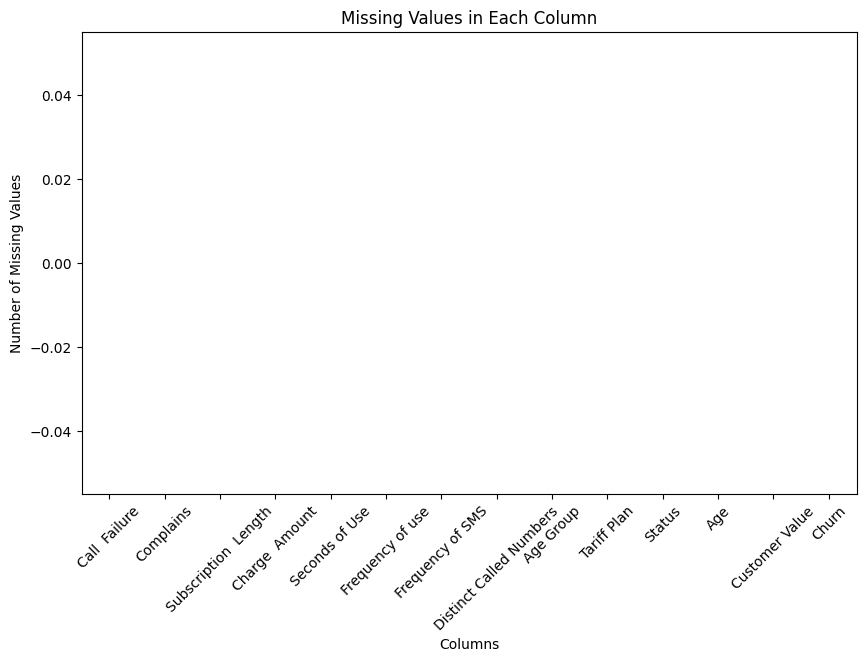

In [ ]:
missing_values = df.isnull()
missing_count = missing_values.sum()
plt.figure(figsize=(10, 6))
missing_count.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.xticks(rotation=45)
plt.show()

3. Box plot for outliers

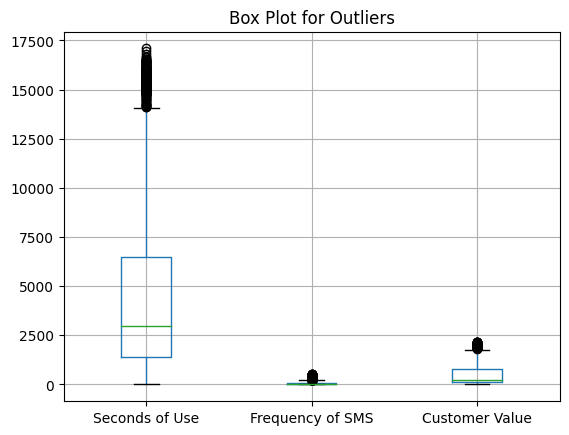

In [ ]:
df.boxplot(column=['Seconds of Use','Frequency of SMS','Customer Value'])
plt.title('Box Plot for Outliers')
plt.show()

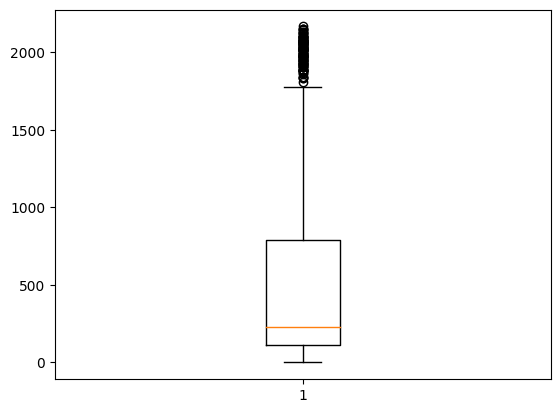

In [ ]:
plt.boxplot(df['Customer Value'])

# show plot
plt.show()

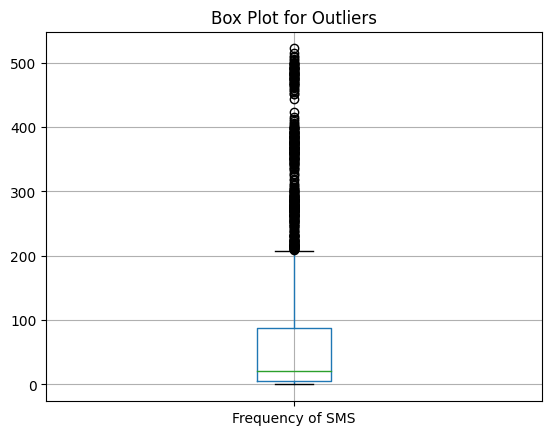

In [ ]:
df.boxplot(column=['Frequency of SMS'])
plt.title('Box Plot for Outliers')
plt.show()

4.

<ipython-input-14-cb26e8c778aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

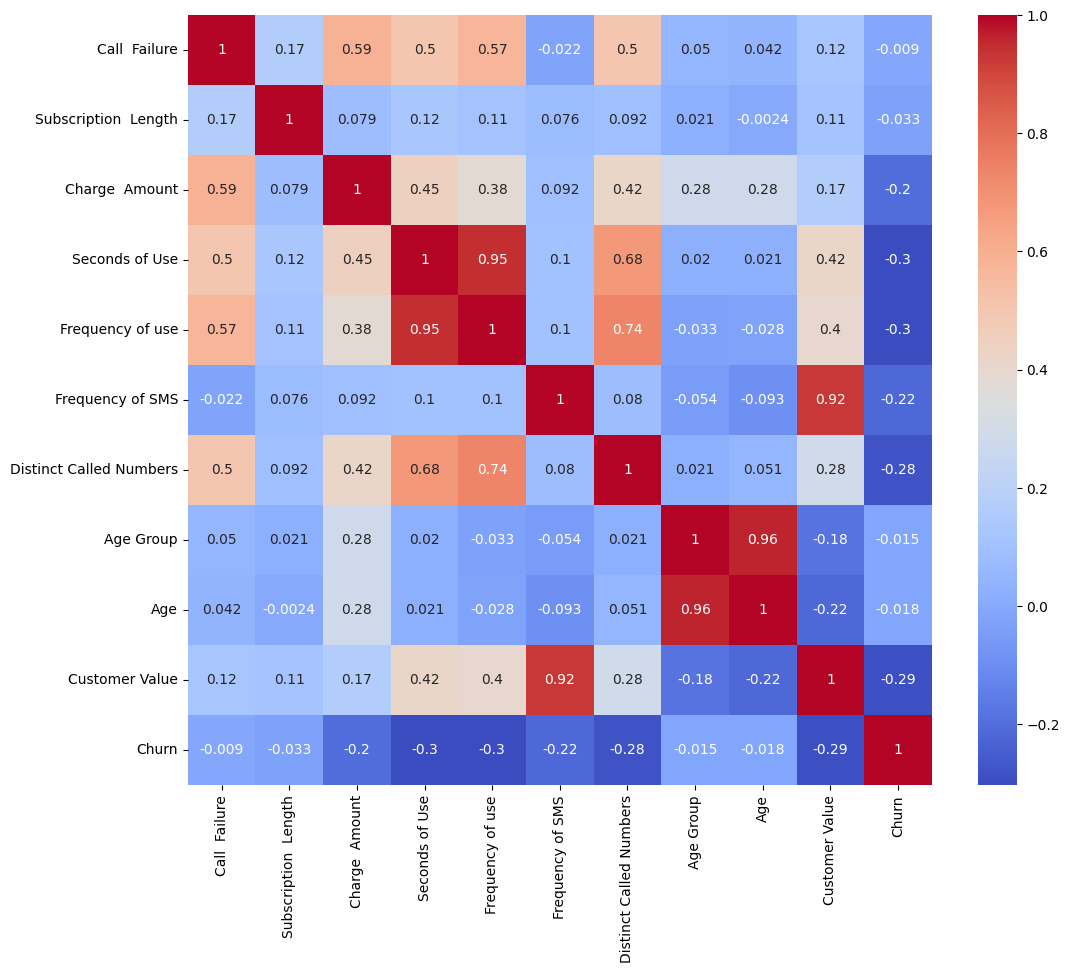

In [ ]:
corr = df.corr()
corr
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cbar=True,cmap='coolwarm')

5.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   object 
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   object 
 10  Status                   3150 non-null   object 
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(10)

6.

In [ ]:
numerical_variables = ['Seconds of Use', 'Customer Value', 'Frequency of use']

# Calculate the correlation matrix
correlation_matrix = df[numerical_variables].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  Seconds of Use  Customer Value  Frequency of use
Seconds of Use          1.000000        0.415087          0.946489
Customer Value          0.415087        1.000000          0.401572
Frequency of use        0.946489        0.401572          1.000000


7.

In [ ]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

8.

In [ ]:
df.duplicated().sum()

300

9.

Text(0.5, 1.0, 'CUSTOMER CHURN')

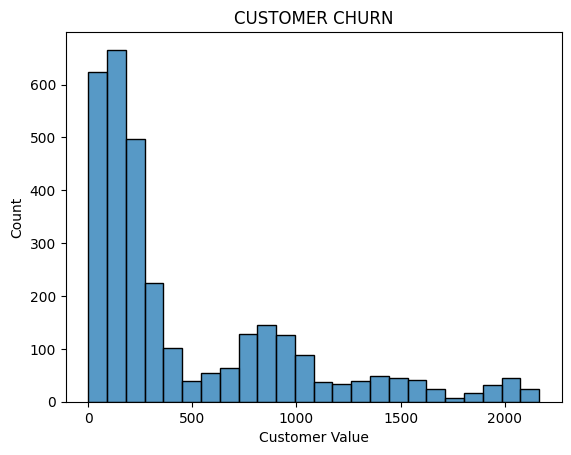

In [ ]:
ax = sns.histplot(df['Customer Value'])
ax.set_title('CUSTOMER CHURN')

10.

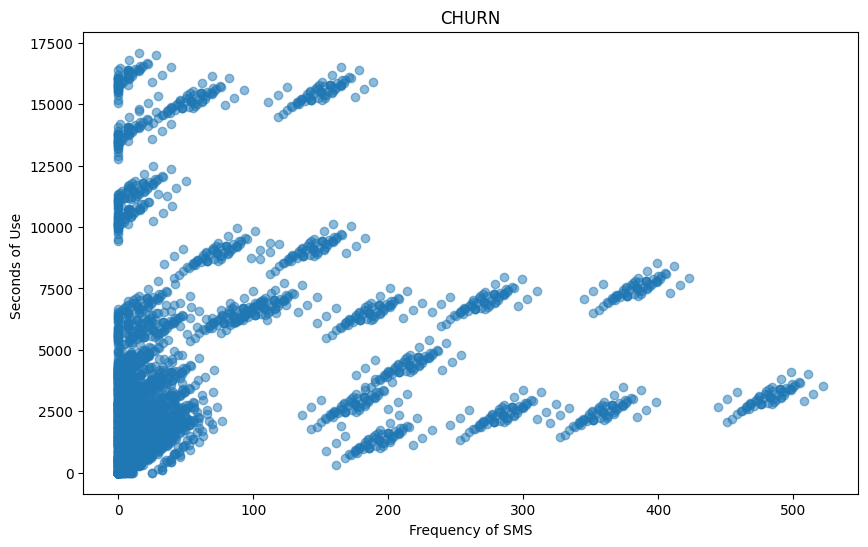

In [ ]:
x_column = 'Frequency of SMS'
y_column = 'Seconds of Use'

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(df[x_column], df[y_column], alpha=0.5)  # alpha controls point transparency
plt.title('CHURN')
plt.xlabel('Frequency of SMS')
plt.ylabel('Seconds of Use ')

plt.show()



10.

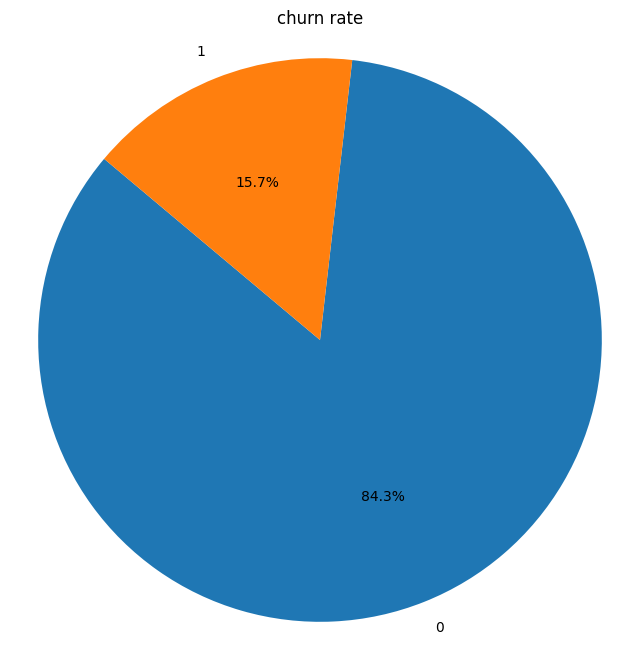

In [ ]:
# Specify the column for which you want to create the pie chart
category_column = 'Churn'

# Calculate the frequency of each category
category_counts = df[category_column].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('churn rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

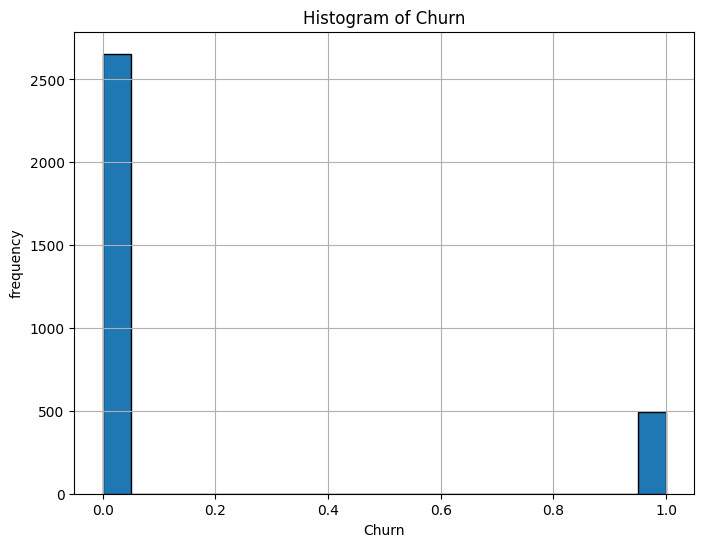

In [ ]:
feature_column = "Churn"

# Plot the histogram
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.hist(df[feature_column],bins=20, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel(feature_column)
plt.ylabel("frequency")
plt.title(f"Histogram of {feature_column}")
plt.grid(True)
plt.show()

In [ ]:
x= pd.get_dummies(df, drop_first=True)
print(x)

      Call  Failure  Subscription  Length  Charge  Amount  Seconds of Use  \
0                 8                    38               0            4370   
1                 0                    39               0             318   
2                10                    37               0            2453   
3                10                    38               0            4198   
4                 3                    38               0            2393   
...             ...                   ...             ...             ...   
3145             21                    19               2            6697   
3146             17                    17               1            9237   
3147             13                    18               4            3157   
3148              7                    11               2            4695   
3149              8                    11               2            1792   

      Frequency of use  Frequency of SMS  Distinct Called Numbers  Age Grou

In [ ]:
x

,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Age,Customer Value,Churn,Complains_yes,Tariff Plan_1,Status_1
0,8,38,0,4370,71,5,17,3,30,197.640,0,0,0,0
1,0,39,0,318,5,7,4,2,25,46.035,0,0,0,1
2,10,37,0,2453,60,359,24,3,30,1536.520,0,0,0,0
3,10,38,0,4198,66,1,35,1,15,240.020,0,0,0,0
4,3,38,0,2393,58,2,33,1,15,145.805,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,19,2,6697,147,92,44,2,25,721.980,0,0,1,0
3146,17,17,1,9237,177,80,42,5,55,261.210,0,0,0,0
3147,13,18,4,3157,51,38,21,3,30,280.320,0,0,0,0
3148,7,11,2,4695,46,222,12,3,30,1077.640,0,0,0,0


In [ ]:
x.drop('Age', axis=1, inplace=True)
print("\nDataFrame after dropping 'City' column:")
print(x)
x.to_csv('updated_dataset.csv')


DataFrame after dropping 'City' column:
      Call  Failure  Subscription  Length  Charge  Amount  Seconds of Use  \
0                 8                    38               0            4370   
1                 0                    39               0             318   
2                10                    37               0            2453   
3                10                    38               0            4198   
4                 3                    38               0            2393   
...             ...                   ...             ...             ...   
3145             21                    19               2            6697   
3146             17                    17               1            9237   
3147             13                    18               4            3157   
3148              7                    11               2            4695   
3149              8                    11               2            1792   

      Frequency of use  Frequency 

**MULTI COLLINEARITY**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range((X).shape[1])]
  return(vif)

In [ ]:
calc_vif(x)

,variables,VIF
0,Call Failure,6.193331
1,Subscription Length,12.792564
2,Charge Amount,4.396304
3,Seconds of Use,43.857064
4,Frequency of use,46.322554
5,Frequency of SMS,49.288737
6,Distinct Called Numbers,6.827844
7,Age Group,11.213164
8,Customer Value,78.552629
9,Churn,2.103948


**TRAIN AND TESTING**

In [ ]:
X=x.drop(["Churn"],axis=1)
y=df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape

((2362, 12), (788, 12))

LOGISTIC REGRESSION


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_output}')

Accuracy: 0.881979695431472
Confusion Matrix:
[[640  14]
 [ 79  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       654
           1       0.80      0.41      0.54       134

    accuracy                           0.88       788
   macro avg       0.84      0.69      0.74       788
weighted avg       0.87      0.88      0.87       788





```
# This is formatted as code
```

****RANDOM FOREST****

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_output}')

Accuracy: 0.9454314720812182
Confusion Matrix:
[[639  15]
 [ 28 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       654
           1       0.88      0.79      0.83       134

    accuracy                           0.95       788
   macro avg       0.92      0.88      0.90       788
weighted avg       0.94      0.95      0.94       788



**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_output}')

Accuracy: 0.9200507614213198
Confusion Matrix:
[[623  31]
 [ 32 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       654
           1       0.77      0.76      0.76       134

    accuracy                           0.92       788
   macro avg       0.86      0.86      0.86       788
weighted avg       0.92      0.92      0.92       788



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_output}')

Accuracy: 0.8629441624365483
Confusion Matrix:
[[629  25]
 [ 83  51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       654
           1       0.67      0.38      0.49       134

    accuracy                           0.86       788
   macro avg       0.78      0.67      0.70       788
weighted avg       0.85      0.86      0.85       788



SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_output}')

Accuracy: 0.8299492385786802
Confusion Matrix:
[[654   0]
 [134   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       654
           1       0.00      0.00      0.00       134

    accuracy                           0.83       788
   macro avg       0.41      0.50      0.45       788
weighted avg       0.69      0.83      0.75       788



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive bayes**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_output}')

Accuracy: 0.5076142131979695
Confusion Matrix:
[[274 380]
 [  8 126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.42      0.59       654
           1       0.25      0.94      0.39       134

    accuracy                           0.51       788
   macro avg       0.61      0.68      0.49       788
weighted avg       0.85      0.51      0.55       788



**Bagging**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

bagging_model.fit(X_train, y_train)
predictions = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_output}')

Accuracy: 0.5076142131979695
Confusion Matrix:
[[274 380]
 [  8 126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.42      0.59       654
           1       0.25      0.94      0.39       134

    accuracy                           0.51       788
   macro avg       0.61      0.68      0.49       788
weighted avg       0.85      0.51      0.55       788



**Boosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

base_model = DecisionTreeClassifier()
boosting_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

boosting_model.fit(X_train, y_train)
predictions = boosting_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_output}')

Accuracy: 0.5076142131979695
Confusion Matrix:
[[274 380]
 [  8 126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.42      0.59       654
           1       0.25      0.94      0.39       134

    accuracy                           0.51       788
   macro avg       0.61      0.68      0.49       788
weighted avg       0.85      0.51      0.55       788



#Neural Network

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/300
74/74 [==============================] - 2s 7ms/step - loss: 2.5654 - accuracy: 0.7870 - val_loss: 0.9498 - val_accuracy: 0.7830
Epoch 2/300
74/74 [==============================] - 0s 4ms/step - loss: 1.0274 - accuracy: 0.8010 - val_loss: 0.6358 - val_accuracy: 0.8096
Epoch 3/300
74/74 [==============================] - 0s 3ms/step - loss: 1.3191 - accuracy: 0.8044 - val_loss: 0.6553 - val_accuracy: 0.7132
Epoch 4/300
74/74 [==============================] - 0s 4ms/step - loss: 1.7199 - accuracy: 0.8086 - val_loss: 0.8008 - val_accuracy: 0.7094
Epoch 5/300
74/74 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.7993 - val_loss: 2.6321 - val_accuracy: 0.8338
Epoch 6/300
74/74 [==============================] - 0s 3ms/step - loss: 1.7458 - accuracy: 0.8010 - val_loss: 0.7079 - val_accuracy: 0.6561
Epoch 7/300
74/74 [==============================] - 0s 3ms/step - loss: 0.8172 - accuracy: 0.8290 - val_loss: 3.8663 - val_accuracy: 0.8464
Epoch 8/300
7

In [ ]:
# Assuming you have more than two classes
# Make predictions on the test set
y_pred_proba = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_proba, axis=1)

# Now you can use y_pred_labels for evaluation

25/25 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


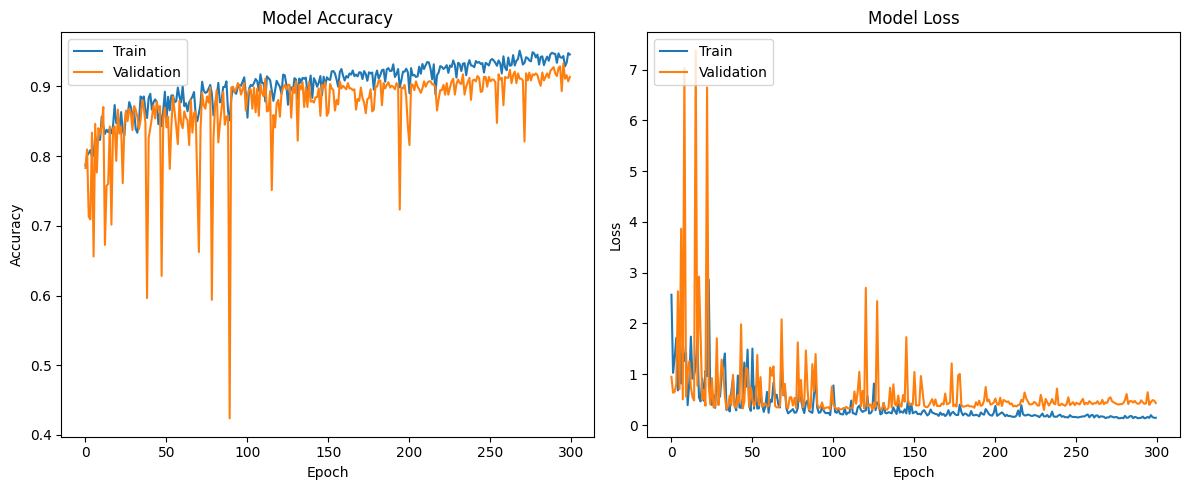

In [ ]:
import matplotlib.pyplot as plt
# Plot the training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Display classification report for more detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred_labels))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       654
           1       0.00      0.00      0.00       134

    accuracy                           0.83       788
   macro avg       0.41      0.50      0.45       788
weighted avg       0.69      0.83      0.75       788



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
